https://github.com/fastai/imagenet-fast/tree/master/cifar10/dawn_submission

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = Path("data/cifar_full/")

In [3]:
from torchvision import transforms, datasets

In [4]:
torch.backends.cudnn.benchmark = True

In [5]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [6]:
num_cpus()

12

In [7]:
bs = 128; num_workers = num_cpus()

We construct the data object manually from low level components in a way that can be used with the fastai library.

In [8]:
traindir = str(PATH/'train')
valdir = str(PATH/'test')
tfms = [transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]

train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
    ] + tfms))

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=bs, shuffle=True, num_workers=num_workers, pin_memory=True)

val_dataset = datasets.ImageFolder(valdir, transforms.Compose(tfms))

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=bs*2, shuffle=False, num_workers=num_workers, pin_memory=True)

In [9]:
data = ModelData(PATH, train_loader, val_loader)
data.sz=32

In [10]:
from models.wideresnet_new import wrn_22

In [11]:
learn = ConvLearner.from_model_data(wrn_22().cuda(), data)
learn.crit = nn.CrossEntropyLoss()
learn.metrics = [accuracy]
wd=1e-4

In [12]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy                   
    0      2.166833   9442.61171 0.0998    



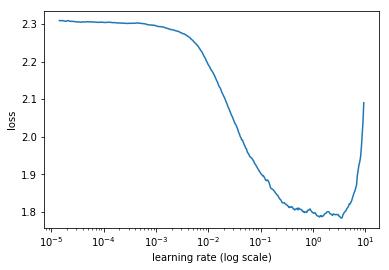

In [13]:
learn.sched.plot(n_skip_end=1)

In [14]:
lr = 1.3

In [15]:
%time learn.fit(lr/10, 1, wds=wd, cycle_len=1, use_clr_beta=(100, 1, 0.9, 0.8))

epoch      trn_loss   val_loss   accuracy                   
    0      1.008451   0.90191    0.6743    

CPU times: user 27.3 s, sys: 12.8 s, total: 40.1 s
Wall time: 39.6 s


[array([0.90191]), 0.6743]

In [16]:
%time learn.fit(lr, 1, wds=wd, cycle_len=40, use_clr_beta=(50, 12.5, 0.95, 0.85))

epoch      trn_loss   val_loss   accuracy                    
    0      0.878525   1.140079   0.6296    
    1      0.687746   0.856598   0.711                       
    2      0.621977   0.87324    0.7156                      
    3      0.547768   0.730919   0.7588                      
    4      0.523188   0.896059   0.7277                      
    5      0.501449   0.760597   0.7561                      
    6      0.485831   0.779973   0.7552                      
    7      0.485944   0.680932   0.7846                      
    8      0.500687   0.848146   0.7432                      
    9      0.49653    1.07791    0.7041                      
    10     0.483923   3.549425   0.4618                      
    11     0.487989   0.745887   0.7625                      
    12     0.475381   0.657576   0.7988                      
    13     0.450686   0.615962   0.7983                      
    14     0.493474   0.82052    0.7611                      
    15     0.489912   1.21

[array([0.18598]), 0.9421]